In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [69]:
ncd9 = pd.read_excel('/Users/user/Documents/업무문서/ncd9_sales_expectation.xlsx')

In [70]:
ncd9_works = ncd9[ncd9['구분3']=='NAVER WORKS']

In [71]:
pt_domain_count = ncd9_works[ncd9_works['회원그룹코드']=='PATR']['회원번호'].count()
od_domain_count = ncd9_works[ncd9_works['회원그룹코드']=='GEN']['회원번호'].count()
pt_smalldomain_count = ncd9_works[(ncd9_works['회원그룹코드']=='PATR')&(ncd9_works['사용량']<=50)]['회원번호'].count()
od_smalldomain_count = ncd9_works[(ncd9_works['회원그룹코드']=='GEN')&(ncd9_works['사용량']<=50)]['회원번호'].count()

In [75]:
works_total_sales = ncd9_works['예상월매출'].sum()
pt_domain_sales = ncd9_works[ncd9_works['회원그룹코드']=='PATR']['예상월매출'].sum()
od_domain_sales = ncd9_works[ncd9_works['회원그룹코드']=='GEN']['예상월매출'].sum()
pt_smalldomain_sales = ncd9_works[(ncd9_works['회원그룹코드']=='PATR')&(ncd9_works['사용량']<=50)]['예상월매출'].sum()
od_smalldomain_sales = ncd9_works[(ncd9_works['회원그룹코드']=='GEN')&(ncd9_works['사용량']<=50)]['예상월매출'].sum()

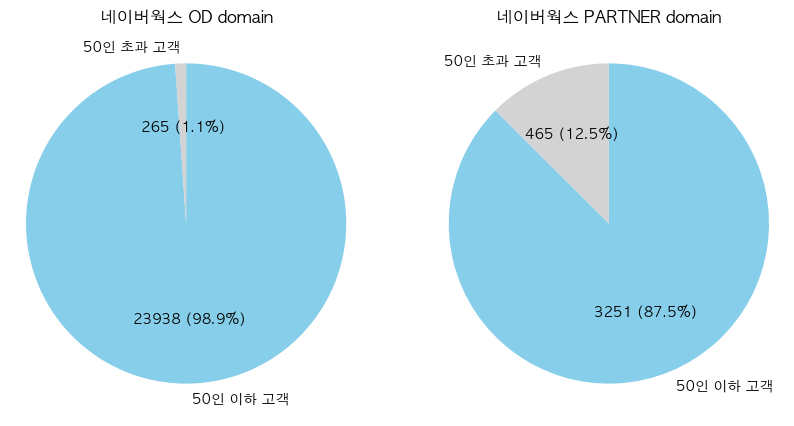

In [77]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic'

pt_small_ratio = pt_smalldomain_count / pt_domain_count
pt_other_ratio = 1 - pt_small_ratio

od_small_ratio = od_smalldomain_count / od_domain_count
od_other_ratio = 1 - od_small_ratio

def make_autopct(counts):
    def my_autopct(pct):
        total = sum(counts)
        absolute = int(pct * total / 100)
        return f'{absolute} ({pct:.1f}%)'
    return my_autopct

pt_labels = ['50인 이하 고객', '50인 초과 고객']
pt_sizes = [pt_smalldomain_count, pt_domain_count - pt_smalldomain_count]
pt_colors = ['skyblue', 'lightgray']

od_labels = ['50인 이하 고객', '50인 초과 고객']
od_sizes = [od_smalldomain_count, od_domain_count - od_smalldomain_count]
od_colors = ['skyblue', 'lightgray']

fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(10, 5))

ax1.pie(pt_sizes, labels=pt_labels, autopct=make_autopct(pt_sizes), startangle=90, counterclock=False, colors=pt_colors)
ax1.set_title('네이버웍스 PARTNER domain')

ax2.pie(od_sizes, labels=od_labels, autopct=make_autopct(od_sizes), startangle=90, counterclock=False, colors=od_colors)
ax2.set_title('네이버웍스 OD domain')

ax1.axis('equal')
ax2.axis('equal')

plt.show()


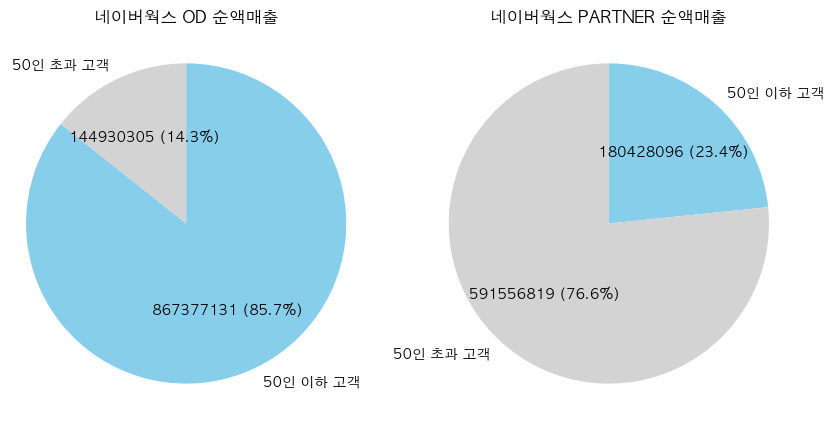

In [79]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic'

pt_small_ratio = pt_smalldomain_sales / pt_domain_sales
pt_other_ratio = 1 - pt_small_ratio

od_small_ratio = od_smalldomain_sales / od_domain_sales
od_other_ratio = 1 - od_small_ratio

def make_autopct(counts):
    def my_autopct(pct):
        total = sum(counts)
        absolute = int(pct * total / 100)
        return f'{absolute} ({pct:.1f}%)'
    return my_autopct

pt_labels = ['50인 이하 고객', '50인 초과 고객']
pt_sizes = [pt_smalldomain_sales, pt_domain_sales - pt_smalldomain_sales]
pt_colors = ['skyblue', 'lightgray']

od_labels = ['50인 이하 고객', '50인 초과 고객']
od_sizes = [od_smalldomain_sales, od_domain_sales - od_smalldomain_sales]
od_colors = ['skyblue', 'lightgray']

fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(10, 5))

ax1.pie(pt_sizes, labels=pt_labels, autopct=make_autopct(pt_sizes), startangle=90, counterclock=False, colors=pt_colors)
ax1.set_title('네이버웍스 PARTNER 순액매출')

ax2.pie(od_sizes, labels=od_labels, autopct=make_autopct(od_sizes), startangle=90, counterclock=False, colors=od_colors)
ax2.set_title('네이버웍스 OD 순액매출')

ax1.axis('equal')
ax2.axis('equal')

plt.show()


In [81]:
od_domain = ncd9_works[ncd9_works['회원그룹코드']=='GEN']
pt_domain = ncd9_works[ncd9_works['회원그룹코드']=='PATR']
od_lowerbound = od_domain['사용량'].quantile(0.80)
od_upper_sales = od_domain[od_domain['사용량']>od_lowerbound]['예상월매출'].sum()
pt_lowerbound = pt_domain['사용량'].quantile(0.80)
pt_upper_sales = pt_domain[pt_domain['사용량']>pt_lowerbound]['예상월매출'].sum()

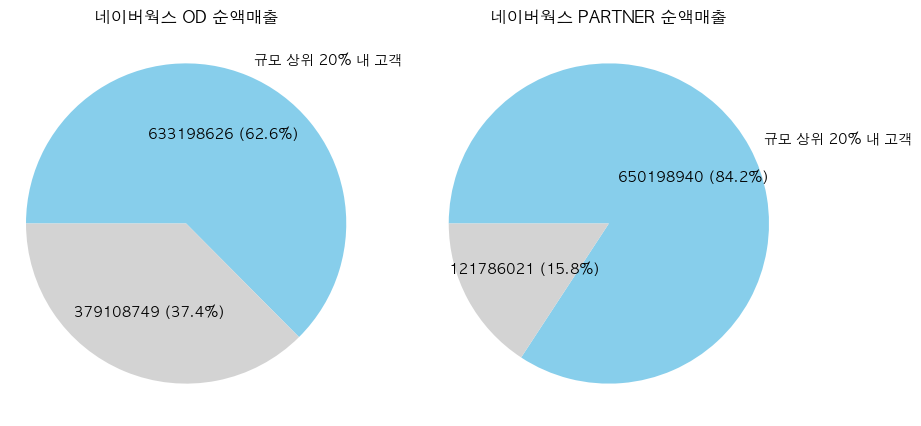

In [83]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic'

pt_small_ratio = pt_upper_sales / pt_domain_sales
pt_other_ratio = 1 - pt_small_ratio

od_small_ratio = od_upper_sales / od_domain_sales
od_other_ratio = 1 - od_small_ratio

def make_autopct(counts):
    def my_autopct(pct):
        total = sum(counts)
        absolute = int(pct * total / 100)
        return f'{absolute} ({pct:.1f}%)'
    return my_autopct

pt_labels = ['규모 상위 20% 내 고객', '']
pt_sizes = [pt_upper_sales, pt_domain_sales - pt_upper_sales]
pt_colors = ['skyblue', 'lightgray']

od_labels = ['규모 상위 20% 내 고객', '']
od_sizes = [od_upper_sales, od_domain_sales - od_upper_sales]
od_colors = ['skyblue', 'lightgray']

fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(10, 5))

ax1.pie(pt_sizes, labels=pt_labels, autopct=make_autopct(pt_sizes), startangle=180, counterclock=False, colors=pt_colors)
ax1.set_title('네이버웍스 PARTNER 순액매출')

ax2.pie(od_sizes, labels=od_labels, autopct=make_autopct(od_sizes), startangle=180, counterclock=False, colors=od_colors)
ax2.set_title('네이버웍스 OD 순액매출')

ax1.axis('equal')
ax2.axis('equal')

plt.show()


In [43]:
boa2109 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2109.xlsx')
boa2110 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2110.xlsx')
boa2111 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2111.xlsx')
boa2112 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2112.xlsx')
boa2201 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2201.xlsx')
boa2202 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2202.xlsx')
boa2203 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2203.xlsx')
boa2204 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2204.xlsx')
boa2205 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2205.xlsx')
boa2206 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2206.xlsx')
boa2207 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2207.xlsx')
boa2208 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2208.xlsx')
boa2209 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2209.xlsx')
boa2210 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2210.xlsx')
boa2211 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2211.xlsx')
boa2212 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2212.xlsx')
boa2301 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2301.xlsx')
boa2302 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2302.xlsx')
boa2303 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2303.xlsx')
boa2304 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2304.xlsx')
boa2305 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2305.xlsx')
boa2306 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2306.xlsx')
boa2307 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2307.xlsx')
boa2308 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2308.xlsx')
boa2309 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2309.xlsx')
boa2310 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2310.xlsx')
boa2311 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2311.xlsx')
boa2312 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2312.xlsx')
boa2401 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2401.xlsx')
boa2402 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2402.xlsx')
boa2403 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2403.xlsx')
boa2404 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2404.xlsx')
boa2405 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2405.xlsx')
boa2406 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2406.xlsx')
boa2407 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2407.xlsx')
boa2408 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2408.xlsx')

In [44]:
boa2109['미터링'] = 1
boa2110['미터링'] = 2
boa2111['미터링'] = 3
boa2112['미터링'] = 4
boa2201['미터링'] = 5
boa2202['미터링'] = 6
boa2203['미터링'] = 7
boa2204['미터링'] = 8
boa2205['미터링'] = 9
boa2206['미터링'] = 10
boa2207['미터링'] = 11
boa2208['미터링'] = 12
boa2209['미터링'] = 13
boa2210['미터링'] = 14
boa2211['미터링'] = 15
boa2212['미터링'] = 16
boa2301['미터링'] = 17
boa2302['미터링'] = 18
boa2303['미터링'] = 19
boa2304['미터링'] = 20
boa2305['미터링'] = 21
boa2306['미터링'] = 22
boa2307['미터링'] = 23
boa2308['미터링'] = 24
boa2309['미터링'] = 25
boa2310['미터링'] = 26
boa2311['미터링'] = 27
boa2312['미터링'] = 28
boa2401['미터링'] = 29
boa2402['미터링'] = 30
boa2403['미터링'] = 31
boa2404['미터링'] = 32
boa2405['미터링'] = 33
boa2406['미터링'] = 34
boa2407['미터링'] = 35
boa2408['미터링'] = 36

In [46]:
def processing (df) :
    return df[['회원번호','회원명','구분3','매출금액(당월)','이용금액(당월)','파트너명','채널']]

boa2109 = processing(boa2109)
boa2110 = processing(boa2110)
boa2111 = processing(boa2111)
boa2112 = processing(boa2112)
boa2201 = processing(boa2201)
boa2202 = processing(boa2202)
boa2203 = processing(boa2203)
boa2204 = processing(boa2204)
boa2205 = processing(boa2205)
boa2206 = processing(boa2206)
boa2207 = processing(boa2207)
boa2208 = processing(boa2208)
boa2209 = processing(boa2209)
boa2210 = processing(boa2210)
boa2211 = processing(boa2211)
boa2212 = processing(boa2212)
boa2301 = processing(boa2301)
boa2302 = processing(boa2302)
boa2303 = processing(boa2303)
boa2304 = processing(boa2304)
boa2305 = processing(boa2305)
boa2306 = processing(boa2306)
boa2307 = processing(boa2307)
boa2308 = processing(boa2308)
boa2309 = processing(boa2309)
boa2310 = processing(boa2310)
boa2311 = processing(boa2311)
boa2312 = processing(boa2312)
boa2401 = processing(boa2401)
boa2402 = processing(boa2402)
boa2403 = processing(boa2403)
boa2404 = processing(boa2404)
boa2405 = processing(boa2405)
boa2406 = processing(boa2406)
boa2407 = processing(boa2407)
boa2408 = processing(boa2408)

In [47]:
def delete_partner (df) :
    id_list = ['솔리드이엔지', '굿어스데이터주식회사', '디딤365 주식회사', '(주)유와이즈원', '(주)브로드밴드아이디씨', '주식회사 아이비컴텍', '(주)웰데이타시스템', '(주)웅진', '(주)안랩클라우드메이트']
    df = df[~df['파트너명'].isin(id_list)]
    return df

boa2109 = delete_partner(boa2109)
boa2110 = delete_partner(boa2110)
boa2111 = delete_partner(boa2111)
boa2112 = delete_partner(boa2112)
boa2201 = delete_partner(boa2201)
boa2202 = delete_partner(boa2202)
boa2203 = delete_partner(boa2203)
boa2204 = delete_partner(boa2204)
boa2205 = delete_partner(boa2205)
boa2206 = delete_partner(boa2206)
boa2207 = delete_partner(boa2207)
boa2208 = delete_partner(boa2208)
boa2209 = delete_partner(boa2209)
boa2210 = delete_partner(boa2210)
boa2211 = delete_partner(boa2211)
boa2212 = delete_partner(boa2212)
boa2301 = delete_partner(boa2301)
boa2302 = delete_partner(boa2302)
boa2303 = delete_partner(boa2303)
boa2304 = delete_partner(boa2304)
boa2305 = delete_partner(boa2305)
boa2306 = delete_partner(boa2306)
boa2307 = delete_partner(boa2307)
boa2308 = delete_partner(boa2308)
boa2309 = delete_partner(boa2309)
boa2310 = delete_partner(boa2310)
boa2311 = delete_partner(boa2311)
boa2312 = delete_partner(boa2312)
boa2401 = delete_partner(boa2401)
boa2402 = delete_partner(boa2402)
boa2403 = delete_partner(boa2403)
boa2404 = delete_partner(boa2404)
boa2405 = delete_partner(boa2405)
boa2406 = delete_partner(boa2406)
boa2407 = delete_partner(boa2407)
boa2408 = delete_partner(boa2408)

In [45]:
od_1 = []
od_works_1 = []
od_place_1 = []
pt_1 = []
pt_works_1 = []
pt_place_1 = []
od_2 = []
od_works_2 = []
od_place_2 = []
pt_2 = []
pt_works_2 = []
pt_place_2 = []

In [48]:
def listin (df) :
    a1 = df[df['채널'].isin(['온라인 매출'])]['매출금액(당월)'].sum()
    od_1.append(a1)
    a2 = df[(df['채널'].isin(['온라인 매출']))&(df['구분3']=='NAVER WORKS')]['매출금액(당월)'].sum()
    od_works_1.append(a2)
    a3 = df[(df['채널'].isin(['온라인 매출']))&(df['구분3']=='WORKBOX')]['매출금액(당월)'].sum()
    od_box_1.append(a3)
    a4 = df[(df['채널'].isin(['온라인 매출']))&(df['구분3']=='WORKPLACE')]['매출금액(당월)'].sum()
    od_place_1.append(a4)
    b1 = df[df['채널'].isin(['파트너 매출'])]['매출금액(당월)'].sum()
    pt_1.append(b1)
    b2 = df[(df['채널'].isin(['파트너 매출']))&(df['구분3']=='NAVER WORKS')]['매출금액(당월)'].sum()
    pt_works_1.append(b2)
    b3 = df[(df['채널'].isin(['파트너 매출']))&(df['구분3']=='WORKBOX')]['매출금액(당월)'].sum()
    pt_box_1.append(b3)
    b4 = df[(df['채널'].isin(['파트너 매출']))&(df['구분3']=='WORKPLACE')]['매출금액(당월)'].sum()
    pt_place_1.append(b4)
    c1 = df[df['채널'].isin(['온라인 매출'])]['이용금액(당월)'].sum()
    od_2.append(c1)
    c2 = df[(df['채널'].isin(['온라인 매출']))&(df['구분3']=='NAVER WORKS')]['이용금액(당월)'].sum()
    od_works_2.append(c2)
    c3 = df[(df['채널'].isin(['온라인 매출']))&(df['구분3']=='WORKBOX')]['이용금액(당월)'].sum()
    od_box_2.append(c3)
    c4 = df[(df['채널'].isin(['온라인 매출']))&(df['구분3']=='WORKPLACE')]['이용금액(당월)'].sum()
    od_place_2.append(c4)
    d1 = df[df['채널'].isin(['파트너 매출'])]['이용금액(당월)'].sum()
    pt_2.append(d1)
    d2 = df[(df['채널'].isin(['파트너 매출']))&(df['구분3']=='NAVER WORKS')]['이용금액(당월)'].sum()
    pt_works_2.append(d2)
    d3 = df[(df['채널'].isin(['파트너 매출']))&(df['구분3']=='WORKBOX')]['이용금액(당월)'].sum()
    pt_box_2.append(d3)
    d4 = df[(df['채널'].isin(['파트너 매출']))&(df['구분3']=='WORKPLACE')]['이용금액(당월)'].sum()
    pt_place_2.append(d4)

In [49]:
listin(boa2109)
listin(boa2110)
listin(boa2111)
listin(boa2112)
listin(boa2201)
listin(boa2202)
listin(boa2203)
listin(boa2204)
listin(boa2205)
listin(boa2206)
listin(boa2207)
listin(boa2208)
listin(boa2209)
listin(boa2210)
listin(boa2211)
listin(boa2212)
listin(boa2301)
listin(boa2302)
listin(boa2303)
listin(boa2304)
listin(boa2305)
listin(boa2306)
listin(boa2307)
listin(boa2308)
listin(boa2309)
listin(boa2310)
listin(boa2311)
listin(boa2312)
listin(boa2401)
listin(boa2402)
listin(boa2403)
listin(boa2404)
listin(boa2405)
listin(boa2406)
listin(boa2407)
listin(boa2408)

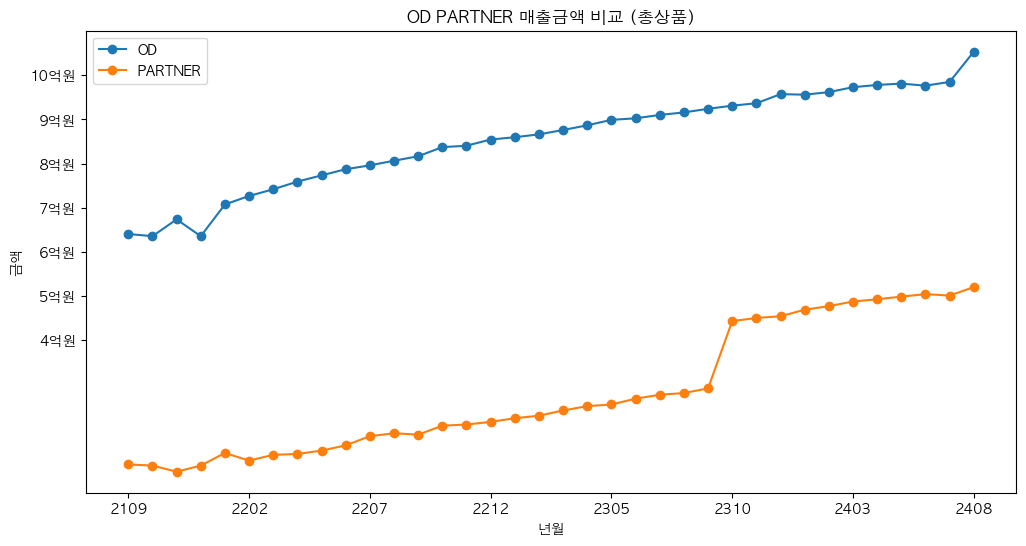

In [50]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic'

fig, ax = plt.subplots(figsize=(12, 6))

x = range(len(od_1))

plt.plot(x, od_1, marker='o', label='OD')
plt.plot(x, pt_1, marker='o', label='PARTNER')

plt.title('OD PARTNER 매출금액 비교 (총상품)')
plt.xlabel('년월')
plt.ylabel('금액')

y_values = [400000000, 500000000, 600000000, 700000000, 800000000, 900000000, 1000000000]
y_labels = ['4억원', '5억원', '6억원', '7억원', '8억원', '9억원', '10억원']
plt.yticks(y_values, y_labels)

x_ticks_positions = range(0, len(od_1), 5)
x_labels = ['2109', '2202', '2207', '2212','2305','2310','2403','2408']
plt.xticks(x_ticks_positions, x_labels)

plt.legend()

plt.show()


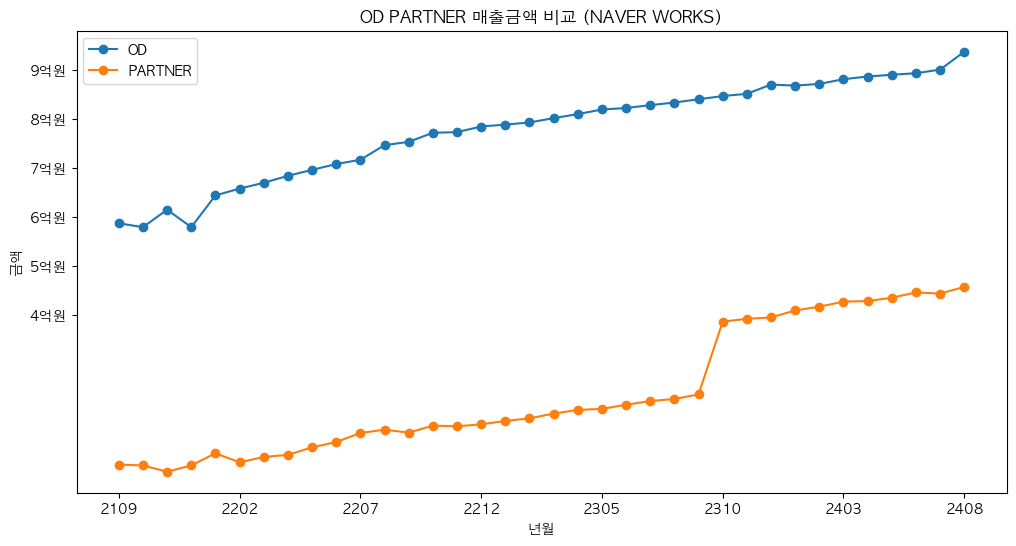

In [51]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic'

fig, ax = plt.subplots(figsize=(12, 6))

x = range(len(od_1))

plt.plot(x, od_works_1, marker='o', label='OD')
plt.plot(x, pt_works_1, marker='o', label='PARTNER')

plt.title('OD PARTNER 매출금액 비교 (NAVER WORKS)')
plt.xlabel('년월')
plt.ylabel('금액')

y_values = [400000000, 500000000, 600000000, 700000000, 800000000, 900000000]
y_labels = ['4억원', '5억원', '6억원', '7억원', '8억원', '9억원']
plt.yticks(y_values, y_labels)

x_ticks_positions = range(0, len(od_1), 5)
x_labels = ['2109', '2202', '2207', '2212','2305','2310','2403','2408']
plt.xticks(x_ticks_positions, x_labels)

plt.legend()

plt.show()


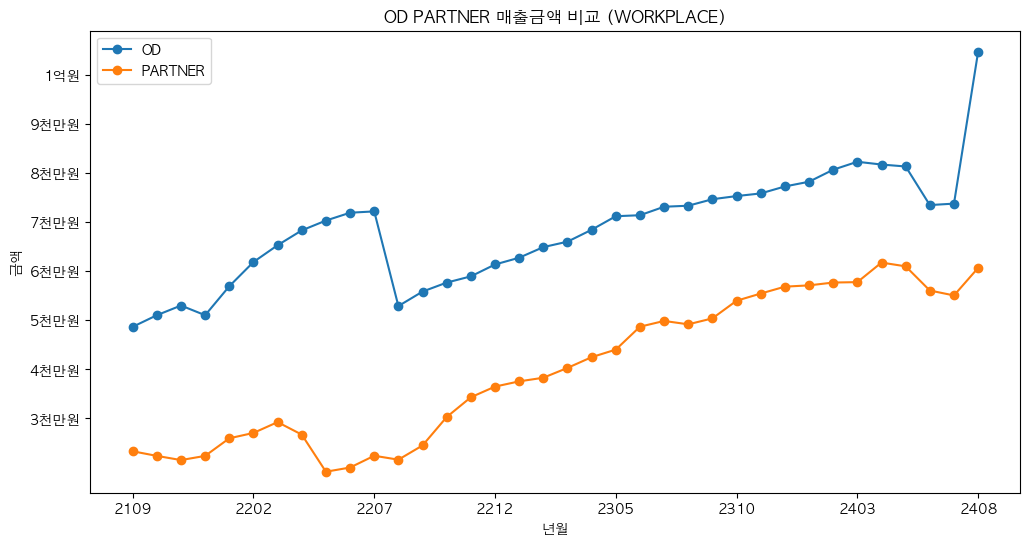

In [52]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic'

fig, ax = plt.subplots(figsize=(12, 6))

x = range(len(od_1))

plt.plot(x, od_place_1, marker='o', label='OD')
plt.plot(x, pt_place_1, marker='o', label='PARTNER')

plt.title('OD PARTNER 매출금액 비교 (WORKPLACE)')
plt.xlabel('년월')
plt.ylabel('금액')

y_values = [30000000, 40000000, 50000000, 60000000, 70000000, 80000000, 90000000, 100000000]
y_labels = ['3천만원', '4천만원', '5천만원', '6천만원', '7천만원', '8천만원', '9천만원', '1억원']
plt.yticks(y_values, y_labels)

x_ticks_positions = range(0, len(od_1), 5)
x_labels = ['2109', '2202', '2207', '2212','2305','2310','2403','2408']
plt.xticks(x_ticks_positions, x_labels)

plt.legend()

plt.show()


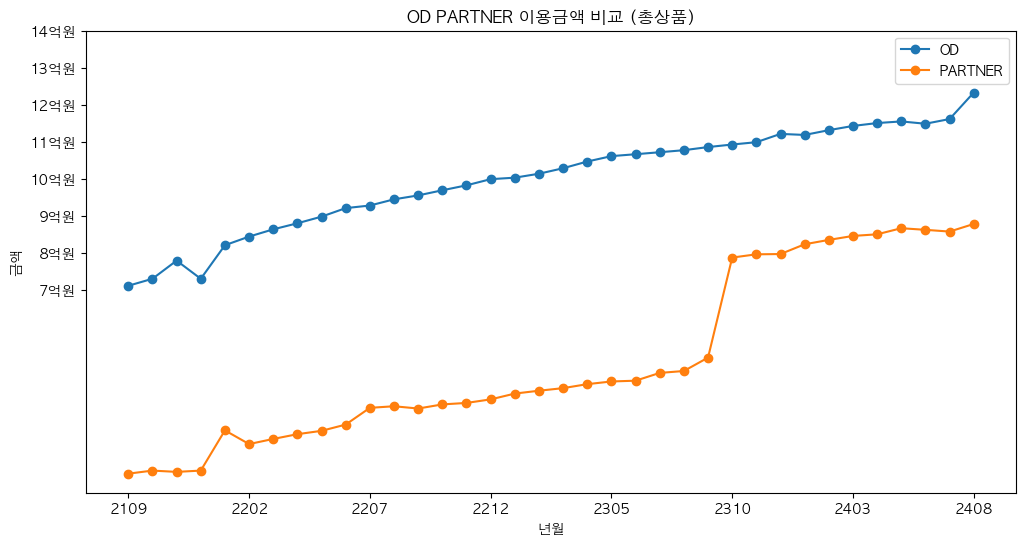

In [53]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic'

fig, ax = plt.subplots(figsize=(12, 6))

x = range(len(od_2))

plt.plot(x, od_2, marker='o', label='OD')
plt.plot(x, pt_2, marker='o', label='PARTNER')

plt.title('OD PARTNER 이용금액 비교 (총상품)')
plt.xlabel('년월')
plt.ylabel('금액')

y_values = [700000000, 800000000, 900000000, 1000000000, 1100000000, 1200000000, 1300000000, 1400000000]
y_labels = ['7억원', '8억원', '9억원', '10억원', '11억원', '12억원', '13억원', '14억원']
plt.yticks(y_values, y_labels)

x_ticks_positions = range(0, len(od_1), 5)
x_labels = ['2109', '2202', '2207', '2212','2305','2310','2403','2408']
plt.xticks(x_ticks_positions, x_labels)

plt.legend()

plt.show()


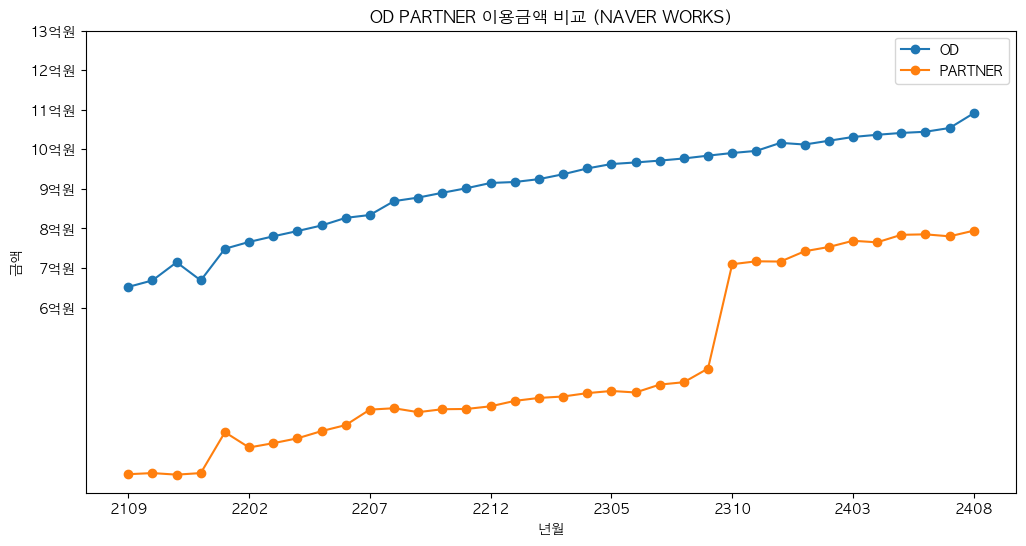

In [54]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic'

fig, ax = plt.subplots(figsize=(12, 6))

x = range(len(od_2))

plt.plot(x, od_works_2, marker='o', label='OD')
plt.plot(x, pt_works_2, marker='o', label='PARTNER')

plt.title('OD PARTNER 이용금액 비교 (NAVER WORKS)')
plt.xlabel('년월')
plt.ylabel('금액')

y_values = [600000000, 700000000, 800000000, 900000000, 1000000000, 1100000000, 1200000000, 1300000000]
y_labels = ['6억원', '7억원', '8억원', '9억원', '10억원', '11억원', '12억원', '13억원']
plt.yticks(y_values, y_labels)

x_ticks_positions = range(0, len(od_1), 5)
x_labels = ['2109', '2202', '2207', '2212','2305','2310','2403','2408']
plt.xticks(x_ticks_positions, x_labels)

plt.legend()

plt.show()


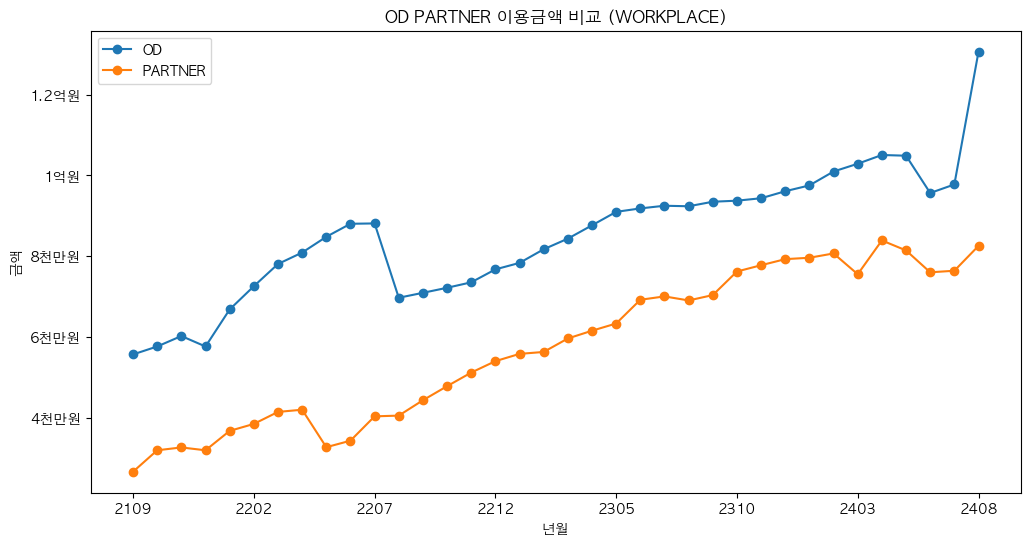

In [69]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic'

fig, ax = plt.subplots(figsize=(12, 6))

x = range(len(od_2))

plt.plot(x, od_place_2, marker='o', label='OD')
plt.plot(x, pt_place_2, marker='o', label='PARTNER')

plt.title('OD PARTNER 이용금액 비교 (WORKPLACE)')
plt.xlabel('년월')
plt.ylabel('금액')

y_values = [40000000, 60000000, 80000000, 100000000, 120000000]
y_labels = ['4천만원', '6천만원', '8천만원', '1억원', '1.2억원']
plt.yticks(y_values, y_labels)

x_ticks_positions = range(0, len(od_1), 5)
x_labels = ['2109', '2202', '2207', '2212','2305','2310','2403','2408']
plt.xticks(x_ticks_positions, x_labels)

plt.legend()

plt.show()


In [116]:
boa = pd.concat([boa2109, boa2110, boa2111, boa2112, boa2201, boa2202,
                 boa2203, boa2204, boa2205, boa2206, boa2207, boa2208,
                 boa2209, boa2210, boa2211, boa2212, boa2201, boa2202,
                 boa2303, boa2304, boa2305, boa2306, boa2307, boa2308,
                 boa2309, boa2310, boa2311, boa2312, boa2401, boa2402,
                 boa2403, boa2404, boa2405, boa2406, boa2407, boa2408])
boa = boa.sort_values(by = ['회원번호','구분3','미터링'])
boa = boa[boa['매출금액(당월)']>0]
boa = boa.groupby(['회원번호', '구분3']).filter(lambda x: len(x) >= 3)
OD = boa[boa['채널']=='온라인 매출']
PT = boa[boa['채널']=='파트너 매출']
od_count = OD[['회원번호', '구분3']].drop_duplicates()
od_retent = len(OD)/ len(od_count)
pt_count = PT[['회원번호', '구분3']].drop_duplicates()
pt_retent = len(PT)/ len(pt_count)

OD_works = OD[OD['구분3'] == 'NAVER WORKS']
PT_works = PT[PT['구분3'] == 'NAVER WORKS']
OD_box = OD[OD['구분3'] == 'WORKBOX']
PT_box = PT[PT['구분3'] == 'WORKBOX']
OD_place = OD[OD['구분3'] == 'WORKPLACE']
PT_place = PT[PT['구분3'] == 'WORKPLACE']

od_works_count = OD_works[['회원번호', '구분3']].drop_duplicates()
od_works_retent = len(OD_works)/ len(od_works_count)
pt_works_count = PT_works[['회원번호', '구분3']].drop_duplicates()
pt_works_retent = len(PT_works)/ len(pt_works_count)

od_box_count = OD_box[['회원번호', '구분3']].drop_duplicates()
od_box_retent = len(OD_box)/ len(od_box_count)
pt_box_count = PT_box[['회원번호', '구분3']].drop_duplicates()
pt_box_retent = len(PT_box)/ len(pt_box_count)

od_place_count = OD_place[['회원번호', '구분3']].drop_duplicates()
od_place_retent = len(OD_place)/ len(od_place_count)
pt_place_count = PT_place[['회원번호', '구분3']].drop_duplicates()
pt_place_retent = len(PT_place)/ len(pt_place_count)

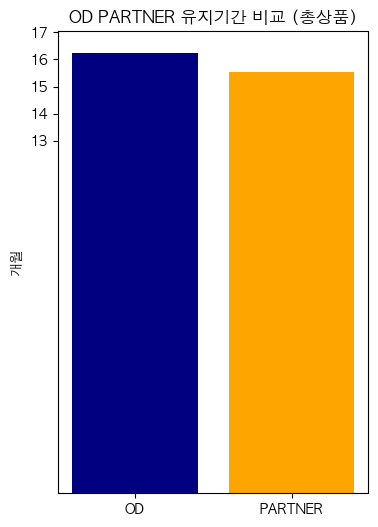

In [144]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4, 6))

values = [od_retent, pt_retent]
labels = ['OD', 'PARTNER']

plt.bar(labels, values, color=['navy', 'orange'])

plt.title('OD PARTNER 유지기간 비교 (총상품)')
plt.ylabel('개월')

y_values = [13, 14, 15, 16, 17]
y_labels = ['13', '14', '15', '16', '17']
plt.yticks(y_values, y_labels)

plt.show()

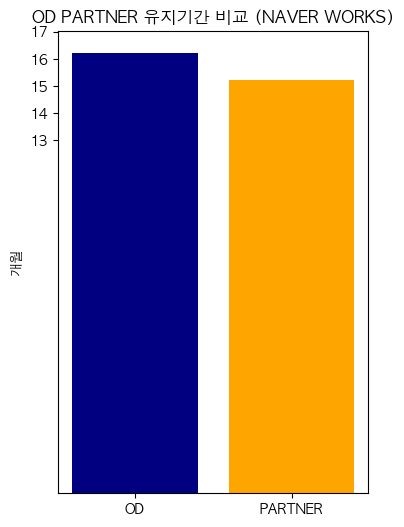

In [148]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4, 6))

values = [od_works_retent, pt_works_retent]
labels = ['OD', 'PARTNER']

plt.bar(labels, values, color=['navy', 'orange'])

plt.title('OD PARTNER 유지기간 비교 (NAVER WORKS)')
plt.ylabel('개월')

y_values = [13, 14, 15, 16, 17]
y_labels = ['13', '14', '15', '16', '17']
plt.yticks(y_values, y_labels)

plt.show()

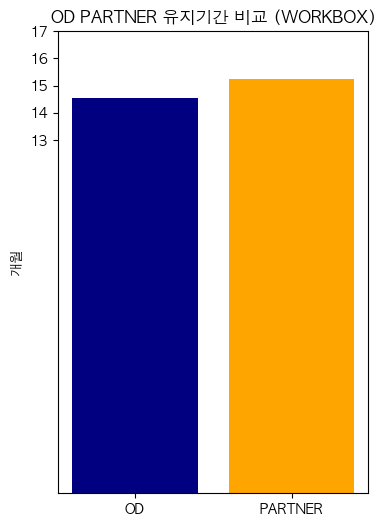

In [150]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4, 6))

values = [od_box_retent, pt_box_retent]
labels = ['OD', 'PARTNER']

plt.bar(labels, values, color=['navy', 'orange'])

plt.title('OD PARTNER 유지기간 비교 (WORKBOX)')
plt.ylabel('개월')

y_values = [13, 14, 15, 16, 17]
y_labels = ['13', '14', '15', '16', '17']
plt.yticks(y_values, y_labels)

plt.show()

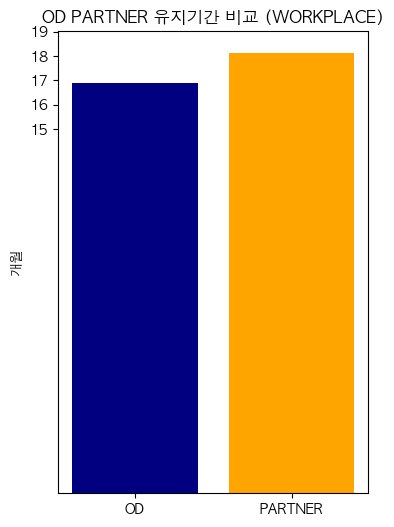

In [158]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4, 6))

values = [od_place_retent, pt_place_retent]
labels = ['OD', 'PARTNER']

plt.bar(labels, values, color=['navy', 'orange'])

plt.title('OD PARTNER 유지기간 비교 (WORKPLACE)')
plt.ylabel('개월')

y_values = [15, 16, 17, 18, 19]
y_labels = ['15', '16', '17', '18', '19']
plt.yticks(y_values, y_labels)

plt.show()

In [186]:
od_churn = 1 - (len(OD[OD['미터링']==36])/len(od_count))
pt_churn = 1 - (len(PT[PT['미터링']==36])/len(pt_count))
od_works_churn = 1 - (len(OD_works[OD_works['미터링']==36])/len(od_works_count))
pt_works_churn = 1 - (len(PT_works[PT_works['미터링']==36])/len(pt_works_count))
od_box_churn = 1 - (len(OD_box[OD_box['미터링']==36])/len(od_box_count))
pt_box_churn = 1 - (len(PT_box[PT_box['미터링']==36])/len(pt_box_count))
od_place_churn = 1 - (len(OD_place[OD_place['미터링']==36])/len(od_place_count))
pt_place_churn = 1 - (len(PT_place[PT_place['미터링']==36])/len(pt_place_count))

In [192]:
od_place_churn

0.8489151873767258

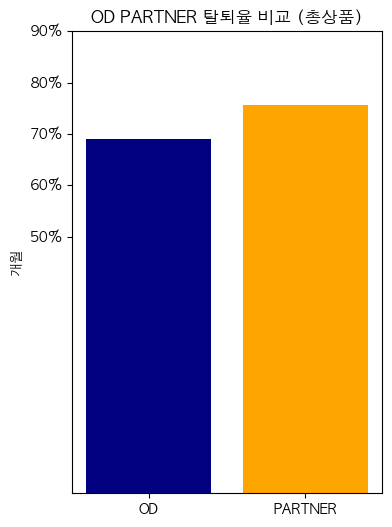

In [202]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4, 6))

values = [od_churn, pt_churn]
labels = ['OD', 'PARTNER']

plt.bar(labels, values, color=['navy', 'orange'])

plt.title('OD PARTNER 탈퇴율 비교 (총상품)')
plt.ylabel('개월')

y_values = [0.5, 0.6, 0.7, 0.8, 0.9]
y_labels = ['50%', '60%', '70%', '80%', '90%']
plt.yticks(y_values, y_labels)

plt.show()

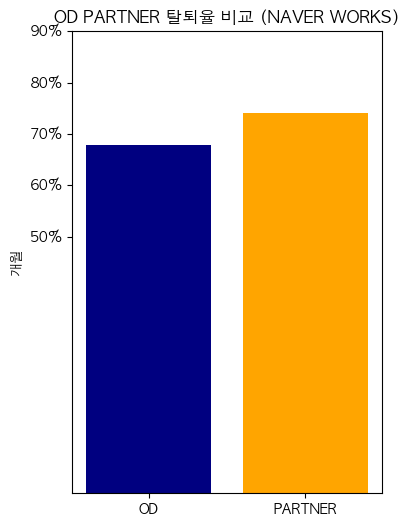

In [196]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4, 6))

values = [od_works_churn, pt_works_churn]
labels = ['OD', 'PARTNER']

plt.bar(labels, values, color=['navy', 'orange'])

plt.title('OD PARTNER 탈퇴율 비교 (NAVER WORKS)')
plt.ylabel('개월')

y_values = [0.5, 0.6, 0.7, 0.8, 0.9]
y_labels = ['50%', '60%', '70%', '80%', '90%']
plt.yticks(y_values, y_labels)

plt.show()

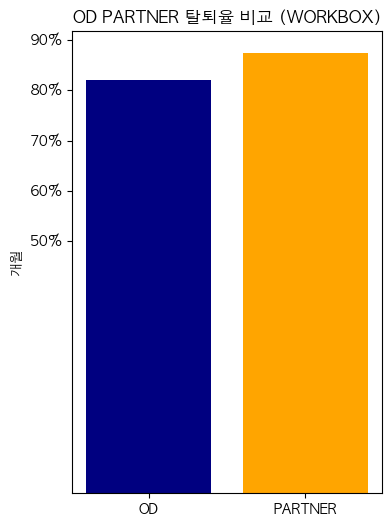

In [198]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4, 6))

values = [od_box_churn, pt_box_churn]
labels = ['OD', 'PARTNER']

plt.bar(labels, values, color=['navy', 'orange'])

plt.title('OD PARTNER 탈퇴율 비교 (WORKBOX)')
plt.ylabel('개월')

y_values = [0.5, 0.6, 0.7, 0.8, 0.9]
y_labels = ['50%', '60%', '70%', '80%', '90%']
plt.yticks(y_values, y_labels)

plt.show()

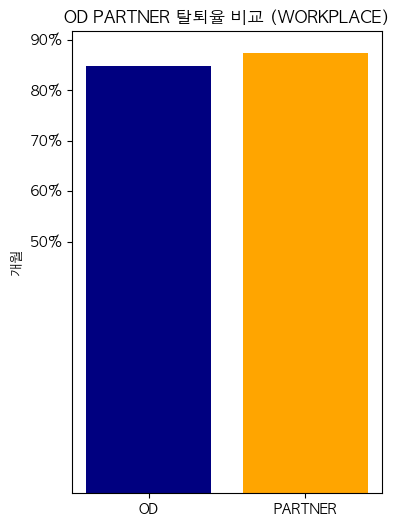

In [200]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4, 6))

values = [od_place_churn, pt_place_churn]
labels = ['OD', 'PARTNER']

plt.bar(labels, values, color=['navy', 'orange'])

plt.title('OD PARTNER 탈퇴율 비교 (WORKPLACE)')
plt.ylabel('개월')

y_values = [0.5, 0.6, 0.7, 0.8, 0.9]
y_labels = ['50%', '60%', '70%', '80%', '90%']
plt.yticks(y_values, y_labels)

plt.show()